In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
from qiskit.execute_function import execute
import math

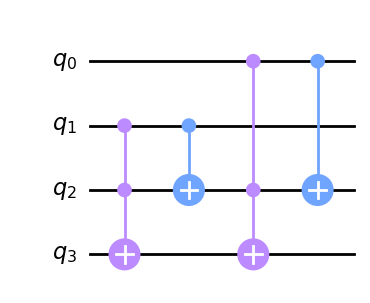

In [2]:
full_adder = QuantumCircuit(4, name = "Full Adder")

c0, a, b, c1 = full_adder.qubits
full_adder.ccx(a, b, c1)
full_adder.cx(a, b)
full_adder.ccx(c0, b, c1)
full_adder.cx(c0, b)

full_adder.draw(output = "mpl")

In [3]:
fa_inst = full_adder.to_instruction()

In [4]:
A = QuantumRegister(4, "a")
B = QuantumRegister(4, "b")
C = QuantumRegister(4, "c")
ci = QuantumRegister(1, "c-1")
cr = ClassicalRegister(5)

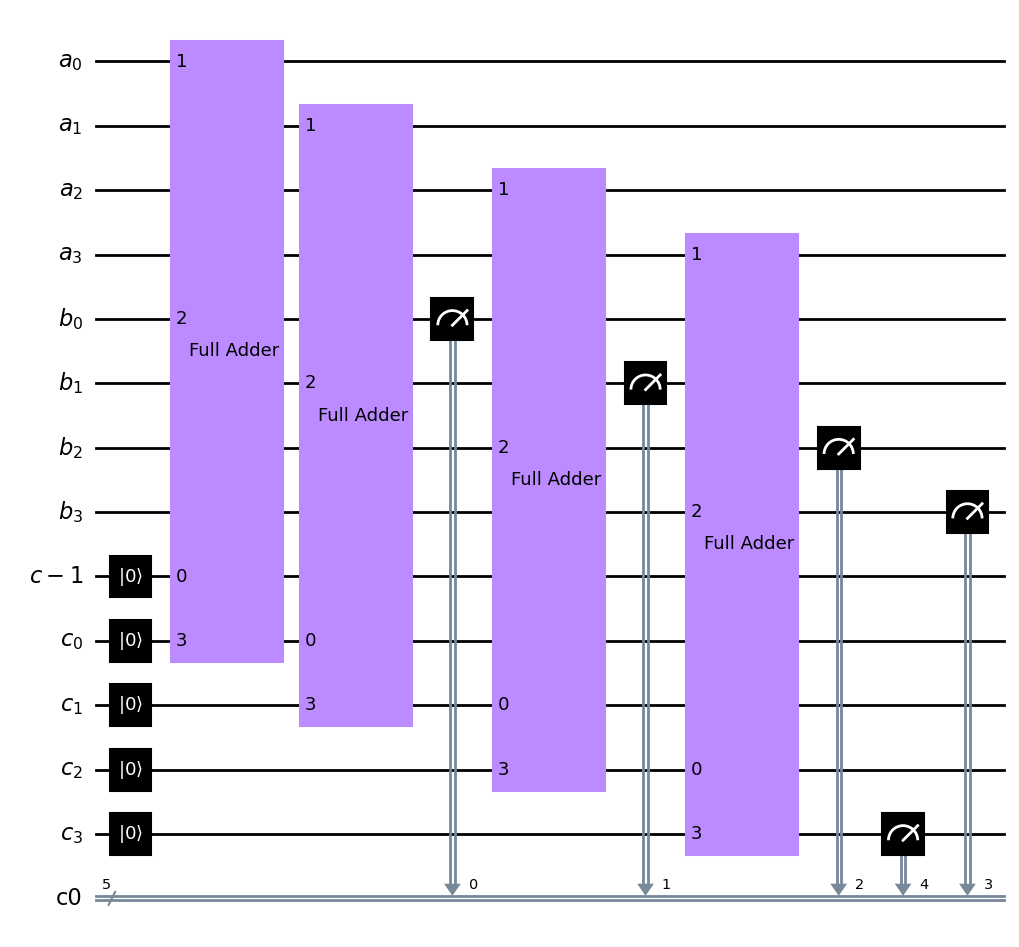

In [5]:
adder = QuantumCircuit(A, B, ci, C, cr)
adder.reset(C)
adder.reset(ci)
for i in range(A.size):
    if i==0:
        adder.append(fa_inst, [ci, A[0], B[0], C[0]])
    else:
        adder.append(fa_inst, [C[i-1], A[i], B[i], C[i]])

adder.measure(C[C.size-1], cr[4])        
for i in range(B.size-1, -1, -1):
    adder.measure(B[i], cr[i])

adder.draw(output = "mpl")

In [6]:
adder_inst = adder.to_instruction()

In [7]:
backend = BasicAer.get_backend('qasm_simulator')

In [8]:
def init_circ():
    A = QuantumRegister(4, "a")
    B = QuantumRegister(4, "b")
    C = QuantumRegister(4, "c")
    ci = QuantumRegister(1, "c-1")
    cr = ClassicalRegister(5)
    return A, B, C, ci, cr, QuantumCircuit(A, B, ci, C, cr)

In [9]:
def execute_circuit(qc):
    job = execute(qc, backend, shots = 10000)
    result = job.result()
    return result.get_counts()

In [10]:
e1_A, e1_B, e1_C, e1_ci, e1_cr, add_e1 = init_circ()

add_e1.x(e1_A[1])
add_e1.x(e1_B[0])
add_e1.x(e1_B[1])
add_e1.x(e1_B[3])

add_e1.append(adder_inst, qargs = list(e1_A) + list(e1_B) + list(e1_ci) + list(e1_C), cargs = [e1_cr])

In [11]:
counts1 = execute_circuit(add_e1)
print(counts1)

{'01101': 10000}


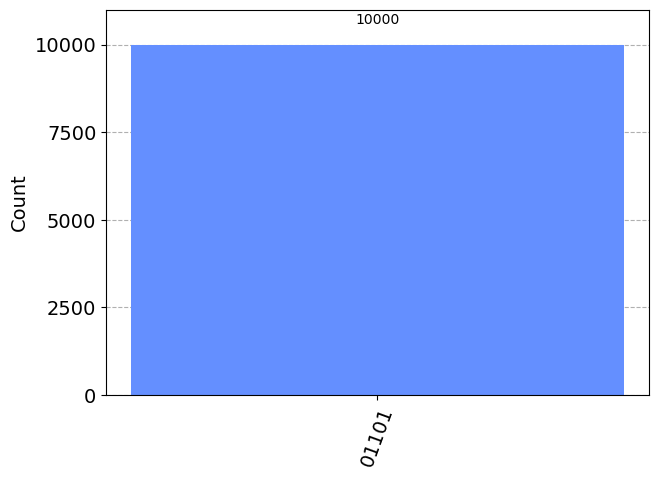

In [12]:
plot_histogram(counts1)

In [13]:
e2_A, e2_B, e2_C, e2_ci, e2_cr, add_e2 = init_circ()

add_e2.x(e2_A[0])
add_e2.x(e2_B[0])
add_e2.x(e2_B[1])

add_e2.append(adder_inst, qargs = list(e2_A) + list(e2_B) + list(e2_ci) + list(e2_C), cargs = [e2_cr])

In [14]:
counts2 = execute_circuit(add_e2)
print(counts2)

{'00100': 10000}


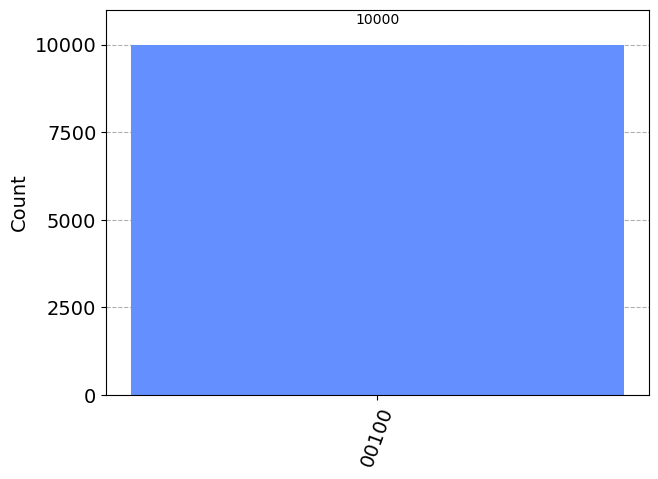

In [15]:
plot_histogram(counts2)

In [16]:
e3_A, e3_B, e3_C, e3_ci, e3_cr, add_e3 = init_circ()

add_e3.x(e3_A[1])
add_e3.h(e3_A[2])
add_e3.cx(e3_A[2], e3_A[1])

add_e3.x(e3_B[0])
add_e3.h(e3_B[1])
add_e3.cx(e3_B[1], e3_B[3])

add_e3.append(adder_inst, qargs = list(e3_A) + list(e3_B) + list(e3_ci) + list(e3_C), cargs = [e3_cr])

In [17]:
counts3 = execute_circuit(add_e3)
print(counts3)

{'00101': 2518, '01101': 2446, '00011': 2506, '01111': 2530}


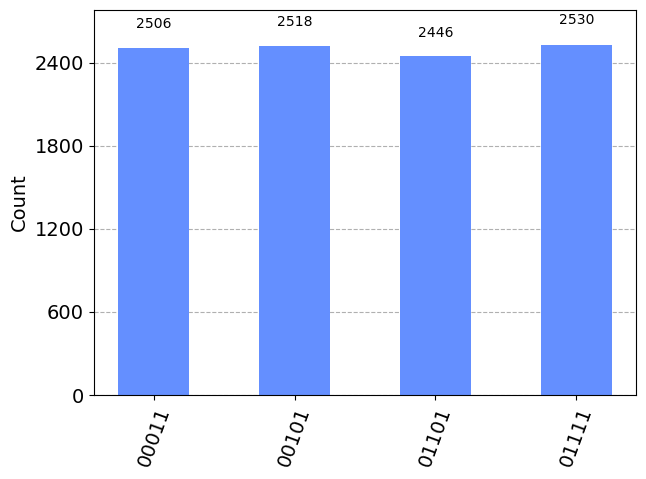

In [18]:
plot_histogram(counts3)

In [19]:
e4_A, e4_B, e4_C, e4_ci, e4_cr, add_e4 = init_circ()

add_e4.h(e4_A[2])
add_e4.cx(e4_A[2], e4_A[1])
add_e4.cx(e4_A[1], e4_A[0])

add_e4.h(e4_B[3])
add_e4.cx(e4_B[3], e4_B[2])
add_e4.cx(e4_B[2], e4_B[1])
add_e4.cx(e4_B[1], e4_B[0])
add_e4.x(e4_B[3])

add_e4.append(adder_inst, qargs = list(e4_A) + list(e4_B) + list(e4_ci) + list(e4_C), cargs = [e4_cr])

In [20]:
counts4 = execute_circuit(add_e4)
print(counts4)

{'01111': 2477, '01110': 2587, '00111': 2478, '01000': 2458}


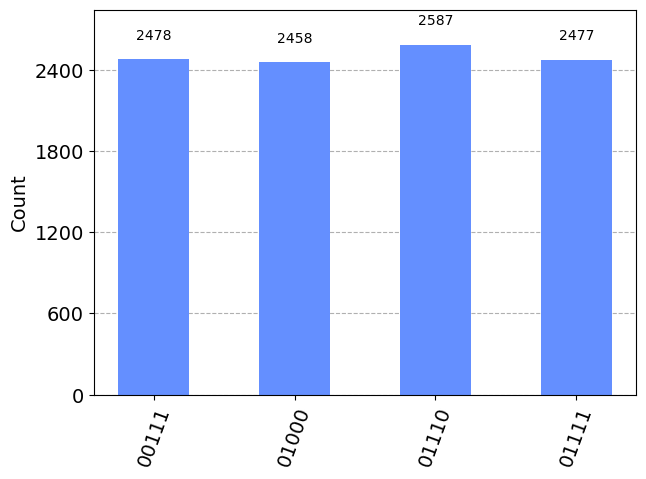

In [21]:
plot_histogram(counts4)